In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/shiva/python programs/Basic projects/data.csv",encoding='unicode_escape')

C:\Users\shiva\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year'] = df['date'].dt.year
df['year'] = df['year'].fillna(df["year"].min())
df['year'] = df['year'].values.astype(int)

In [5]:
df.head(2)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990


In [6]:
def printnullvalues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[df.isnull().sum().sort_values(ascending = False)!=0]
    percent = total/len(df)*100
    percent = percent[df.isnull().sum().sort_values(ascending = False)!=0]
    concat = pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    print(concat)

In [7]:
printnullvalues(df)

                              Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
location                          3   0.000688
sampling_date                     3   0.000688


In [8]:
 df.head(2)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990


In [9]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
year                                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 14 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null datetime64[ns]
year                           435742 non-null int32
dtypes: datetime64[ns](1), float64(5), int32(1), object(7)
memory usage: 44.9+ MB


In [11]:
df["type"].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

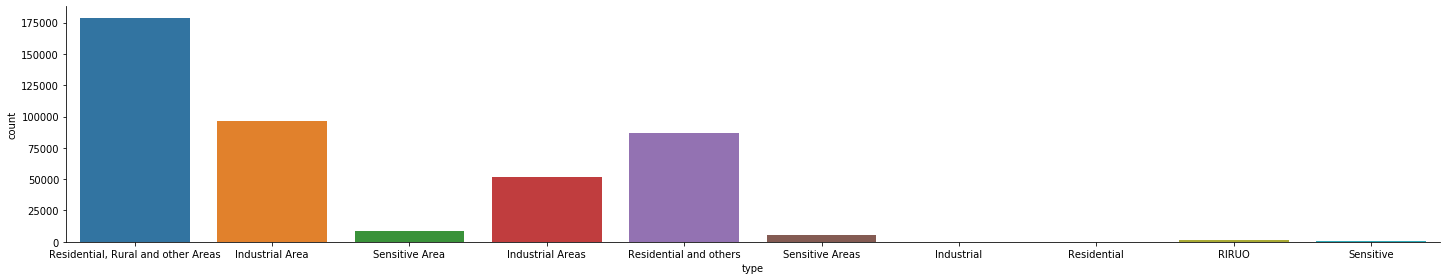

In [12]:
sns.catplot("type",data=df,kind="count",height=4,aspect=5) #lets know the count of values by type

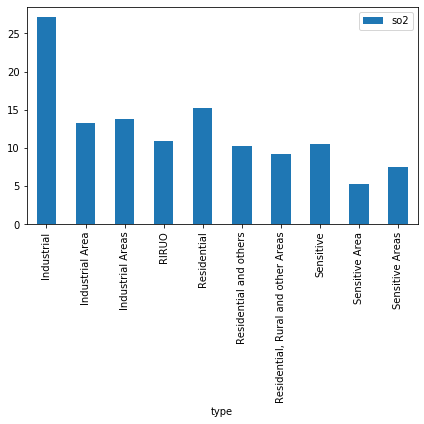

In [13]:
#here will know the type of areas in terms of SO2 and am considering this through its mean value 
grp = df.groupby(["type"]).mean()["so2"].to_frame()
grp.plot.bar(figsize = (7,4))

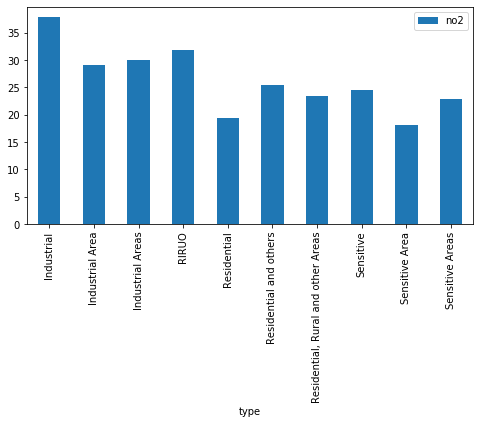

In [14]:
#the same is done here but by NO2 gas
grp = df.groupby(['type']).mean()["no2"].to_frame()
grp.plot.bar(figsize=(8,4))

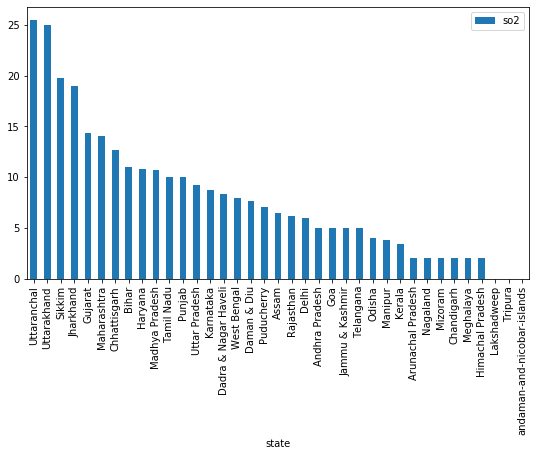

In [34]:
#here will know the ranges of SO2 with regards to different states
df[['so2','state']].groupby(['state']).median().sort_values('so2',ascending=False).plot.bar(figsize=(9,5))

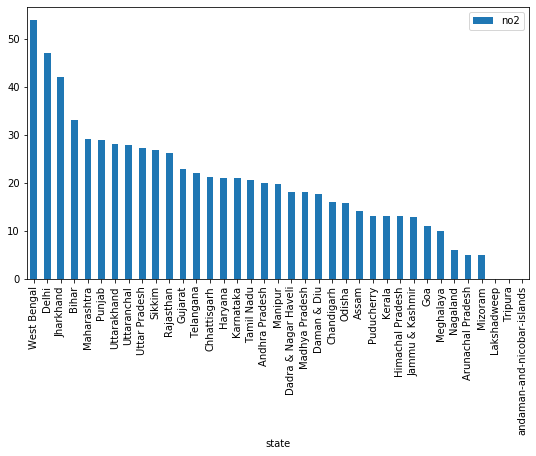

In [39]:
#smae thing performed here but with NO2 gas
df[['no2','state']].groupby(['state']).median().sort_values('no2',ascending=False).plot.bar(figsize=(9,5))

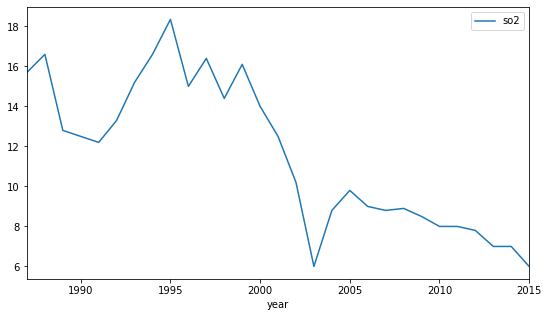

In [44]:
#we can see the trend so2 gas through years
df[["state","year","so2"]].groupby(['year']).median().sort_values(['year'],ascending=False).plot(figsize=(9,5))

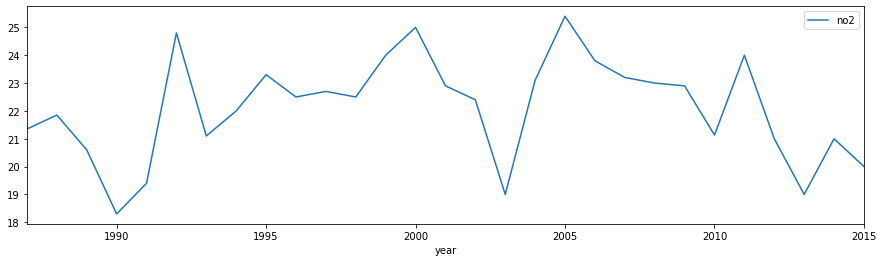

In [71]:
#here we see it with NO2
df[["state","no2","year"]].groupby("year").median().sort_values("year",ascending=False).plot(figsize=(15,4))

In [47]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01,1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01,1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01,1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01,1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01,1990


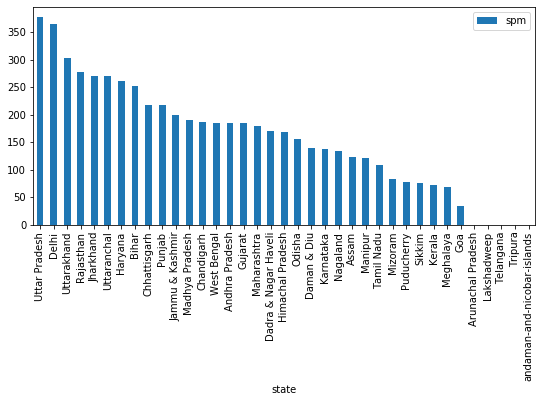

In [51]:
df[["spm",'state']].groupby("state").median().sort_values("spm",ascending=False).plot.bar(figsize=(9,4))

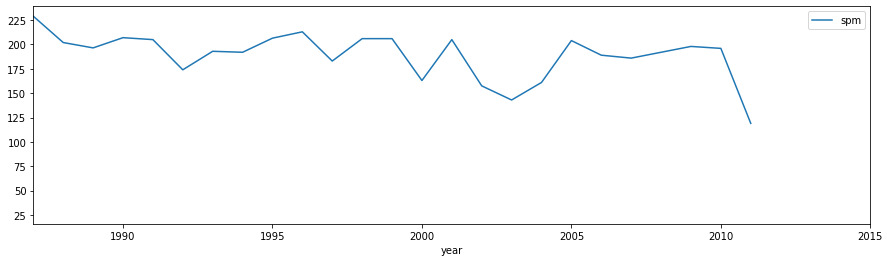

In [73]:
df[['spm','year']].groupby("year").median().sort_values("year",ascending=False).plot(figsize=(15,4))

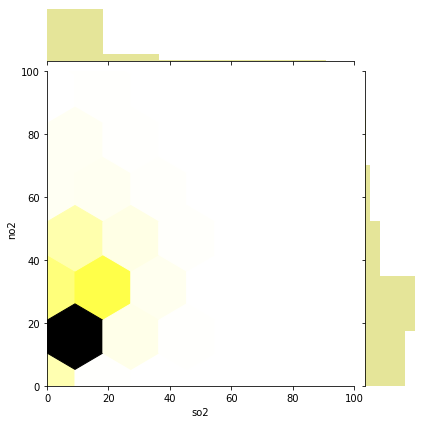

In [78]:
#showing the relationship btwn NO2 & SO2
sns.jointplot(x='so2',y='no2',data=df,kind='hex',color='y',xlim={0,100},ylim={0,100})